# WAR-Predictor.ipynb
### **Scope:** Create a multiple linear regression model and random forest regression model to predict a pitcher's WAR based on other statistics.

In [45]:
#Package Imports
import pandas as pd 
import numpy as np
import rfpimp 
import sklearn.metrics as metrics
import os 
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor

In [46]:
#Load master dataset
df_pitching = pd.read_csv('pitching-masterdataset.csv')

print(df_pitching.describe())

            Season            W            L          ERA            G  \
count  3422.000000  3422.000000  3422.000000  3422.000000  3422.000000   
mean   2015.751023     6.230567     5.939801     3.900009    40.379018   
std       3.072060     4.267957     3.654775     1.172525    20.029921   
min    2011.000000     0.000000     0.000000     0.540000     8.000000   
25%    2013.000000     3.000000     3.000000     3.100000    25.000000   
50%    2016.000000     5.000000     5.000000     3.810000    33.000000   
75%    2018.000000     9.000000     8.000000     4.607500    61.000000   
max    2021.000000    24.000000    19.000000     9.580000    85.000000   

                GS           CG          ShO           SV          HLD  ...  \
count  3422.000000  3422.000000  3422.000000  3422.000000  3422.000000  ...   
mean     13.345120     0.274693     0.134424     3.141146     4.746055  ...   
std      12.577168     0.759965     0.443922     8.742923     7.737213  ...   
min       0.00000

In [47]:


#Split the master dataset into training set and testing set
#df_training, df_testing = train_test_split(df_pitching, test_size=0.25, random_state=42, shuffle=True)
df_training = df_pitching[df_pitching['Season']<=2019]
df_testing = df_pitching[df_pitching['Season']>=2020]

print("Number of records in training set: " + str(len(df_training)))
print("Number of records in testing set: " + str(len(df_testing)))
print("Total number of records in master dataset: " + str(len(df_pitching)))

Number of records in training set: 3003
Number of records in testing set: 419
Total number of records in master dataset: 3422


In [48]:
#Determine x and y variables. Let x represent the independent variables and y represent the dependent variable.
y_train = df_training['WAR']
X_train = df_training.drop(columns={'WAR', 'Season', 'Name', 'Team', 'playerid'})

y_test = df_testing['WAR']
X_test = df_testing.drop(columns={'WAR', 'Season', 'Name', 'Team', 'playerid'})

In [49]:
#Construct multiple regression model
regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)

#Apply multiple linear regression model prediction
y_pred_linear = regr.predict(X_test)

#R-squared results to determine the success of the multiple linear regression model
r2_linear = r2_score(y_test, y_pred_linear)
print("Multiple Linear Regression R-Squared Score: " + str(r2_linear))

Multiple Linear Regression R-Squared Score: 0.9831799381496875


In [50]:
#Construct random forest regression model
forest_regr = RandomForestRegressor(n_estimators=100, random_state=0)
forest_regr.fit(X_train, y_train)

#Apply random forest model prediction
y_pred_forest = forest_regr.predict(X_test)

In [51]:
def regression_metrics(y_test, y_pred):
    #Regression metrics
    explained_variance = metrics.explained_variance_score(y_test, y_pred)
    mean_absolute_error = metrics.mean_absolute_error(y_test, y_pred)
    mean_squared_error = metrics.mean_squared_error(y_test, y_pred)
    median_absolute_error = metrics.median_absolute_error(y_test, y_pred)

    #Output regression metrics
    print("Explained Variance: " + str(explained_variance))
    print("Mean Absolute Error: " + str(mean_absolute_error))
    print("Mean Squared Error: " + str(mean_squared_error))
    print("Median Absolute Error: " + str(median_absolute_error))

In [52]:
#Regression metrics for Linear Regression model
print("Multiple Linear Regression Statistics:")
regression_metrics(y_test, y_pred_linear)

print("-----------------------------------------")

#Regression metrics for Random Forest Model
print("Random Forest Model Statistics:")
regression_metrics(y_test, y_pred_forest)

Multiple Linear Regression Statistics:
Explained Variance: 0.9831838449922355
Mean Absolute Error: 0.1289538522183015
Mean Squared Error: 0.028577457633002207
Median Absolute Error: 0.10236038864008179
-----------------------------------------
Random Forest Model Statistics:
Explained Variance: 0.9717870357088043
Mean Absolute Error: 0.16540572792362768
Mean Squared Error: 0.05267931980906922
Median Absolute Error: 0.11999999999999944


         Importance
Feature            
FIP-       1.785194
K/9        1.779280
SO         1.337482
K-BB%      1.062546
HR         0.712657
AVG        0.568158
IP         0.506609
HR/9       0.456419
WHIP       0.288288
BB         0.285993


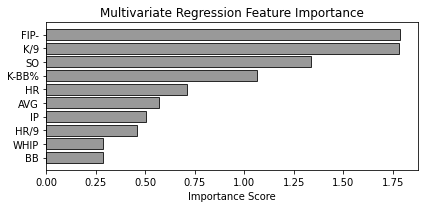

In [53]:
#Project feature importances
regrImportance = rfpimp.importances(regr, X_test, y_test)
regrImportance_filtered = regrImportance.head(10)

#Plot feature importances
graph, axis = plt.subplots(figsize=(6, 3))

axis.barh(regrImportance_filtered.index, regrImportance_filtered['Importance'], height=0.8, facecolor='grey', alpha=0.8, edgecolor='k')
axis.set_xlabel('Importance Score')
axis.set_title('Multivariate Regression Feature Importance')
plt.gca().invert_yaxis()

graph.tight_layout()


print(regrImportance_filtered.head(15))

In [54]:
#Determine coefficients

regressionCoefficient = regr.coef_
#forestCoefficient = forest_regr.coef_

for x, y in enumerate(regressionCoefficient):
    print('Feature: %0d, Score: %.5f' % (x,y))

#for x, y in enumerate(forestCoefficient):
#    print('Feature: %0d, Score: %.5f' % (x,y))

Feature: 0, Score: 0.00394
Feature: 1, Score: 0.00386
Feature: 2, Score: 0.03495
Feature: 3, Score: -0.00562
Feature: 4, Score: 0.03740
Feature: 5, Score: 0.05716
Feature: 6, Score: -0.02283
Feature: 7, Score: 0.00949
Feature: 8, Score: 0.00913
Feature: 9, Score: 0.00795
Feature: 10, Score: 0.01517
Feature: 11, Score: -0.00040
Feature: 12, Score: -0.00101
Feature: 13, Score: -0.00302
Feature: 14, Score: 0.00206
Feature: 15, Score: -0.11290
Feature: 16, Score: -0.03528
Feature: 17, Score: -0.00467
Feature: 18, Score: -0.00717
Feature: 19, Score: -0.00236
Feature: 20, Score: 0.01342
Feature: 21, Score: 0.02426
Feature: 22, Score: -0.65078
Feature: 23, Score: 0.36901
Feature: 24, Score: 0.00562
Feature: 25, Score: 1.33111
Feature: 26, Score: -0.00132
Feature: 27, Score: 0.02569
Feature: 28, Score: 0.14092
Feature: 29, Score: -19.84051
Feature: 30, Score: 2.50224
Feature: 31, Score: 7.90401
Feature: 32, Score: -0.00173
Feature: 33, Score: -0.00093
Feature: 34, Score: -0.05599
Feature: 35, 